In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv("NYC_Restaurants.csv", dtype=unicode)

Populating the interactive namespace from numpy and matplotlib


## Q1: Create a unique name for each restaurant ##

* Create new column, 'RESTAURANT', combining DBA, BUILDING, STREET, and ZIP CODE fields.
* Add RESTAURANT column to df dataframe
* Print first 10 values of RESTAURANT column for example. 

In [2]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE']

df['RESTAURANT'][:10]


0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

## Q2: How many restaurants are included in the data? ##

* Drop all duplicate values in RESTAURANT column to get a Series of all unique restaurants (all rows with unique addresses)

OR
* use the value_counts function to see how many unique values there are in the RESTAURANTS column of the dataframe
* The length of the value_counts result equals the number of unique Restaurants included in the data


In [43]:
#get series of all unique restaurants by dropping duplicate RESTAURANT values
restaurants_unique = df.drop_duplicates(subset='RESTAURANT')
unique_copy = restaurants_unique.copy(deep=True)
unique_copy.set_index('RESTAURANT', inplace=True)

print "Total restaurants included in the data: " + str(len(restaurants_unique))

#OR, use value_counts - yields Series that represents number of violations by RESTAURANT
restaurant_vc = df['RESTAURANT'].value_counts()
total_restaurants = len(restaurant_vc)
print "Total restaurants included in the data: " + str(total_restaurants)

Total restaurants included in the data: 10114
Total restaurants included in the data: 10114


## Q3: How many chains are there? ##

* Use previously created Series of all unique restaurants, employ value_counts to get frequency of each restaurant that shares the same "DBA" value, or name
* Number of chain restaurants is equal to the restaurants in resulting series that have a frequency greater than 2


In [47]:
#use value_counts to get frequency of each unique restaurant
vc = restaurants_unique['DBA'].value_counts()

#create mask, a Boolean Series where values are True when the restaurant frequency is greater than 2
chain_mask = (vc >= 2)

#from Boolean mask, create series of all restaurants that are chains
chains = vc[chain_mask]
total_chains = len(chains)
print "Number of chains: " + str(total_chains)


Number of chains: 368


## Q4: Plot a bar graph of the top 20 most popular chains ##

* use previously created Series of chain restaurants to plot top 20 most popular

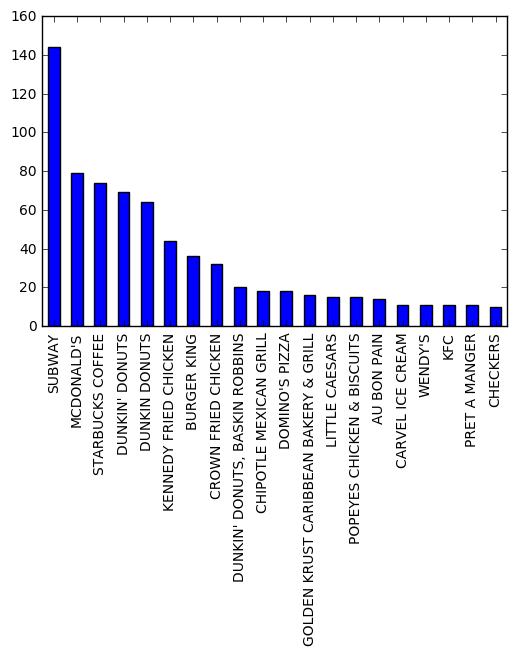

In [15]:
# Plot a histogram of the top-20 most popular chains from previously created chains series.
top_20_chains = chains[:20]
top_20_chains.plot(kind='bar')

## Q5: What fraction of all restaurants are chains? ##

* create new variable equal to the previously calculated number of chain restaurants divided by the number of total unique restaurants

In [16]:
chains_percentage = float(total_chains)/float(total_restaurants)*100
print "Percentage of restaurants that are chains: " + str(chains_percentage) + '%'

Percentage of restaurants that are chains: 3.63852086217%


## Q6: Plot the number of non-chain restaurants in each boro.#

#### NOT COMPLETE ####

* First, we need to figure out all the non-chain restaurants
* Then select out only those restaurants 
* Finally plot the number of such restaurants by boro. Make sure to look at the plot; we don’t want to see... oh... the “missing” boro.

## Q8: Plot the popularity of cuisines. ##

* Employ value_counts on restaurants_unique, the dataframe consisting only of unique restaurants.
* plot top 20 values (cuisines) on a bar graph

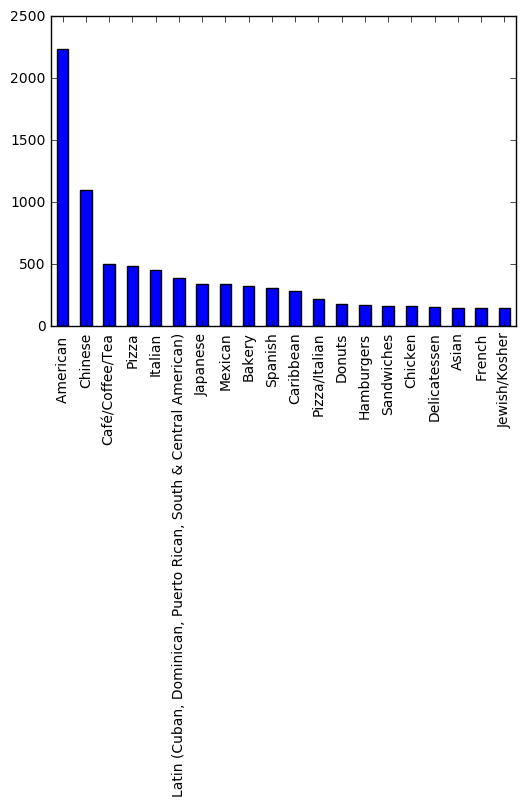

In [50]:
cuisine_vc = restaurants_unique['CUISINE DESCRIPTION'].value_counts()
cuisine_top20 = cuisine_vc[:20]
cuisine_top20.plot(kind='bar')

## Q9: Plot the cuisines among restaurants which do not get cited for violations. ##

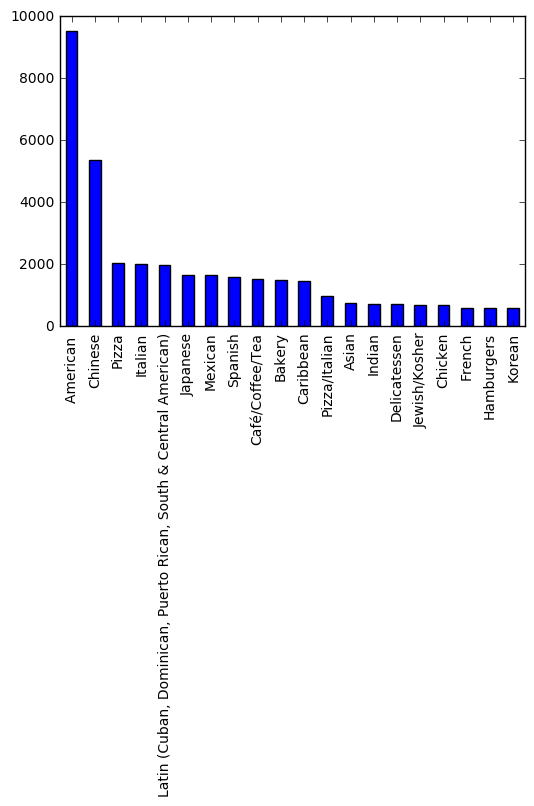

In [79]:
cuis_rest = df[['CUISINE DESCRIPTION', 'RESTAURANT']]

mask_cuisine = cuis_rest['CUISINE DESCRIPTION'].notnull()
mask_rest = cuis_rest['RESTAURANT'].notnull()

mask_both = (mask_cuisine & mask_rest)

cuis_rest_nocitation = cuis_rest[mask_both]

vc_citation = cuis_rest_nocitation['CUISINE DESCRIPTION'].value_counts()

vc_citation_top20 = vc_citation[:20]
vc_citation_top20.plot(kind='bar')

## Q10: Which cuisines tend to be the cleanest? ##

In [87]:
over_20 = vc_citation[vc_citation >= 20]
over_20

American                                                            9522
Chinese                                                             5365
Pizza                                                               2041
Italian                                                             2017
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    1959
Japanese                                                            1659
Mexican                                                             1645
Spanish                                                             1588
Café/Coffee/Tea                                                     1529
Bakery                                                              1491
Caribbean                                                           1470
Pizza/Italian                                                        967
Asian                                                                755
Indian                                             